In [341]:
import importlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing as mp
from pathlib import PurePath, Path
import pyarrow
import scipy.stats as stats
import scipy
from statsmodels.tsa.stattools import adfuller
import time
import sys

# import plotnine as pn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report, accuracy_score

from book_functions import *

importlib.reload(sys.modules['book_functions'])
# importlib.reload(sys.modules['sklearn'])

<module 'book_functions' from 'C:\\Users\\mlevy\\Workspace\\Advances-in-Financial-Machine-Learning\\book_functions.py'>

In [2]:
# 5.1
N = 1000
# Generating random time series
s = pd.Series(np.random.randn(N))

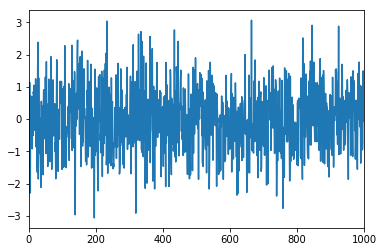

In [3]:
s.plot()

0    0.509402
1   -1.296410
2    1.138262
3   -0.210197
4   -2.287553
dtype: float64


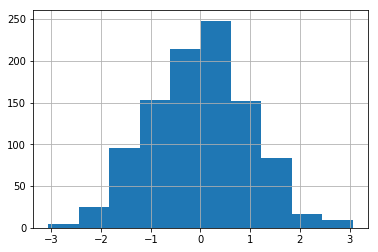

In [4]:
s.hist()
print(s.head())

In [10]:
# a - ADF statistic to test stationarity
# Memory-less stationary series:
# So pval should be less than 0.05 
# and adf statistic less than critical values 
res = adfuller(s)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.078499
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [12]:
# b
# Non-stationary series with memory
cusum = s.cumsum()

0    0.509402
1   -0.787008
2    0.351254
3    0.141057
4   -2.146495
dtype: float64

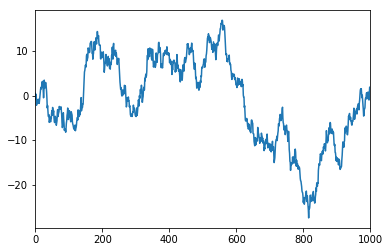

In [13]:
cusum.plot()
cusum.head()

In [15]:
for i in range(0,5):
    diff_ = np.diff(cusum, i)
    p = adfuller(diff_)[1]
    print(i, p)
    
# Order of integration is order one since 
# that is the number of differences needed to 
# achieve stationarity i.e. pval < 0.05

0 0.4678517370246163
1 2.1527411326215513e-24
2 1.5005024163614398e-22
3 4.915736487123866e-29
4 3.497846358333663e-30


In [16]:
res = adfuller(cusum)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.629310
p-value: 0.467852
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [19]:
# c
over_diff = np.diff(cusum, 2)

res = adfuller(over_diff)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -12.160100
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


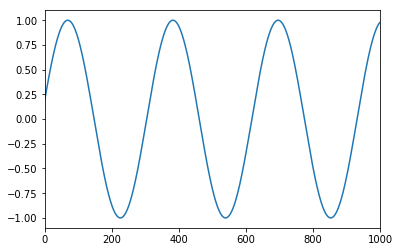

In [76]:
# 5.2

# Generating sine function time series
# stationary series with memory
x = np.linspace(0, 10, N)
s = pd.Series(np.sin(2*x + .2))
s.plot()

0    0.198669
1    0.218249
2    0.237742
3    0.257139
4    0.276433
dtype: float64

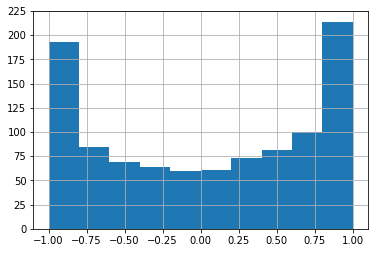

In [77]:
s.hist()
s.head()

In [78]:
# a
res = adfuller(s)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1014771348873419.750000
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


0    1.198669
1    2.416918
2    3.654660
3    4.911799
4    6.188231
dtype: float64

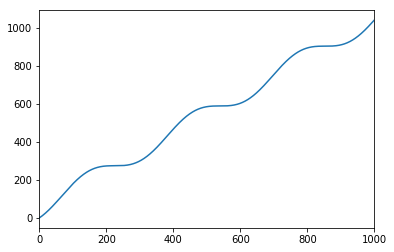

In [79]:
# b
# non-stationary series w/ memory
s_shift = (s+1).cumsum()
s_shift.plot()
s_shift.head()

In [80]:
res = adfuller(s_shift)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 7.738420
p-value: 1.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [199]:
df = s_shift.rename('close').to_frame()
df.head()

,close
0,1.198669
1,2.416918
2,3.654660
3,4.911799
4,6.188231


In [82]:
for d in np.linspace(0,1,11):
    frac_df = fracDiff(df, d)
    res = adfuller(frac_df['close'])
    print(d)
    print('ADF Statistic: %f' % res[0])
    print('p-value: %f' % res[1])
    print('Num of Obs: %f' % res[3])
    print('Critical Values:')
    for key, value in res[4].items():
        print('\t%s: %.3f' % (key, value))
        
# when d == .01, we get pval below 5%

0.0
ADF Statistic: 8.551358
p-value: 1.000000
Num of Obs: 983.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
0.1
ADF Statistic: -19.605574
p-value: 0.000000
Num of Obs: 268.000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
0.2
ADF Statistic: -2.374694
p-value: 0.149007
Num of Obs: 323.000000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572
0.30000000000000004
ADF Statistic: -127.213120
p-value: 0.000000
Num of Obs: 445.000000
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
0.4
ADF Statistic: -164.587962
p-value: 0.000000
Num of Obs: 608.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
0.5
ADF Statistic: -98.872110
p-value: 0.000000
Num of Obs: 770.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
0.6000000000000001
ADF Statistic: -4.926601
p-value: 0.000031
Num of Obs: 885.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
0.7000000000000001
ADF Statistic: -44.548373
p-value: 0.000000
Num of Obs: 947.000000
Critical V

In [102]:
for d in np.linspace(0,1,11):
    print('\nD value: %f' % d)
    frac_df = fracDiff(df, d, thres=1e-5)
    if frac_df.empty:
        continue
    # print(frac_df.shape[0])
    try:
        res = adfuller(frac_df['close'], maxlag=1)
    except Exception as e:
        print('Error: ' + str(e))
        continue
    print('ADF Statistic: %f' % res[0])
    print('p-value: %f' % res[1])
    print('Num of Obs: %f' % res[3])
    print('Critical Values:')
    for key, value in res[4].items():
        print('\t%s: %.3f' % (key, value))
        
# when d == 0.6, we get pval below 5%

# todo: look into errors - when d= [.1, .2, .3, .4, .5]
# as fracdiff doesn't return large enough df


D value: 0.000000
ADF Statistic: 0.708903
p-value: 0.990014
Num of Obs: 997.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568

D value: 0.100000
EMPTY: Unable to concat in Frac Diff

D value: 0.200000
EMPTY: Unable to concat in Frac Diff

D value: 0.300000
EMPTY: Unable to concat in Frac Diff

D value: 0.400000
Error: maxlag should be < nobs

D value: 0.500000
Error: maxlag should be < nobs

D value: 0.600000
ADF Statistic: -89.022906
p-value: 0.000000
Num of Obs: 3.000000
Critical Values:
	1%: -10.417
	5%: -5.778
	10%: -3.392

D value: 0.700000
ADF Statistic: -6495.754390
p-value: 0.000000
Num of Obs: 8.000000
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

D value: 0.800000
ADF Statistic: -8264.497579
p-value: 0.000000
Num of Obs: 26.000000
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630

D value: 0.900000
ADF Statistic: -22799.750408
p-value: 0.000000
Num of Obs: 94.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583

D value: 1.000000
ADF Statistic

In [148]:
# 5.3
# TODO: figure out how to fit sine wave to series df

In [149]:
# 5.4
# Load data
data_f = PurePath('data/clean_IVE_ticks.parq')
df = pd.read_parquet(data_f)
print(df)

                        price     bid     ask   size      v            dv
dates                                                                    
2009-09-28 09:30:00   50.7900   50.70   50.79    100    100  5.079000e+03
2009-09-28 09:30:00   50.7100   50.70   50.79    638    638  3.235298e+04
2009-09-28 09:31:32   50.7500   50.75   50.76    100    100  5.075000e+03
2009-09-28 09:31:33   50.7500   50.72   50.75    100    100  5.075000e+03
2009-09-28 09:31:50   50.7500   50.73   50.76    300    300  1.522500e+04
2009-09-28 09:31:51   50.7500   50.74   50.76    300    300  1.522500e+04
2009-09-28 09:32:06   50.7800   50.76   50.78    300    300  1.523400e+04
2009-09-28 09:32:06   50.7800   50.76   50.78    500    500  2.539000e+04
2009-09-28 09:32:06   50.7800   50.76   50.78    100    100  5.078000e+03
2009-09-28 09:32:56   50.8226   50.81   50.83    100    100  5.082260e+03
2009-09-28 09:33:02   50.8100   50.80   50.81    500    500  2.540500e+04
2009-09-28 09:33:02   50.8100   50.80 

In [150]:
df_subset = df['2018':]

In [151]:
df_subset

,price,bid,ask,size,v,dv
dates,,,,,,
2018-01-02 09:29:45,114.3600,114.32,114.71,100,100,1.143600e+04
2018-01-02 09:29:45,114.3400,114.32,114.71,100,100,1.143400e+04
2018-01-02 09:30:00,114.5700,114.58,114.79,16500,16500,1.890405e+06
2018-01-02 09:30:38,114.6025,114.52,114.65,162,162,1.856560e+04
2018-01-02 09:30:57,114.5600,114.53,114.57,200,200,2.291200e+04
2018-01-02 09:31:01,114.5400,114.53,114.56,100,100,1.145400e+04
2018-01-02 09:31:34,114.5600,114.56,114.59,157,157,1.798592e+04
2018-01-02 09:31:57,114.5580,114.55,114.57,217,217,2.485909e+04
2018-01-02 09:32:41,114.6100,114.60,114.61,300,300,3.438300e+04


In [327]:
df_subsub = df_subset[:1000][['price']]

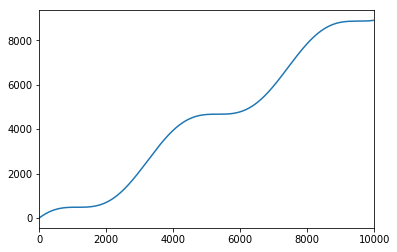

In [309]:
# Redoing 5.2.b.iii
x = np.linspace(0, 30, 10000)
s = pd.Series(np.sin(.5*x + 3))
s_shift = (s+1).cumsum()
s_shift.plot()
df = s_shift.rename('close').to_frame()

In [307]:
for d in np.linspace(0,1,11):
    print('\nD value: %f' % d)
    frac_df = fracDiff(df, d, thres=1e-4)
    try:
        res = adfuller(frac_df['close'])
    except Exception as e:
        print('Error: ' + str(e))
        continue
    res = adfuller(frac_df['close'])
    print('ADF Statistic: %f' % res[0])
    print('p-value: %f' % res[1])
    print('Num of Obs: %f' % res[3])
    print('Critical Values:')
    for key, value in res[4].items():
        print('\t%s: %.3f' % (key, value))

        
# main issue seems to be 1e-5 being too small of thres
# it cause 'skip' value to be too large ie skipping
# most of the dataset


D value: 0.000000
skip: 1.000000
ADF Statistic: 28.470104
p-value: 1.000000
Num of Obs: 9979.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

D value: 0.100000
skip: 9957.000000
ADF Statistic: -0.005794
p-value: 0.958050
Num of Obs: 33.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616

D value: 0.200000
skip: 9932.000000
ADF Statistic: 0.025055
p-value: 0.960556
Num of Obs: 65.000000
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591

D value: 0.300000
skip: 9868.000000
ADF Statistic: 0.154031
p-value: 0.969562
Num of Obs: 129.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579

D value: 0.400000
skip: 9713.000000
ADF Statistic: -1.205958
p-value: 0.671027
Num of Obs: 284.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572

D value: 0.500000
skip: 9329.000000
ADF Statistic: -8.814814
p-value: 0.000000
Num of Obs: 668.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569

D value: 0.600000
skip: 8387.000000
ADF Statistic: -90.194946
p

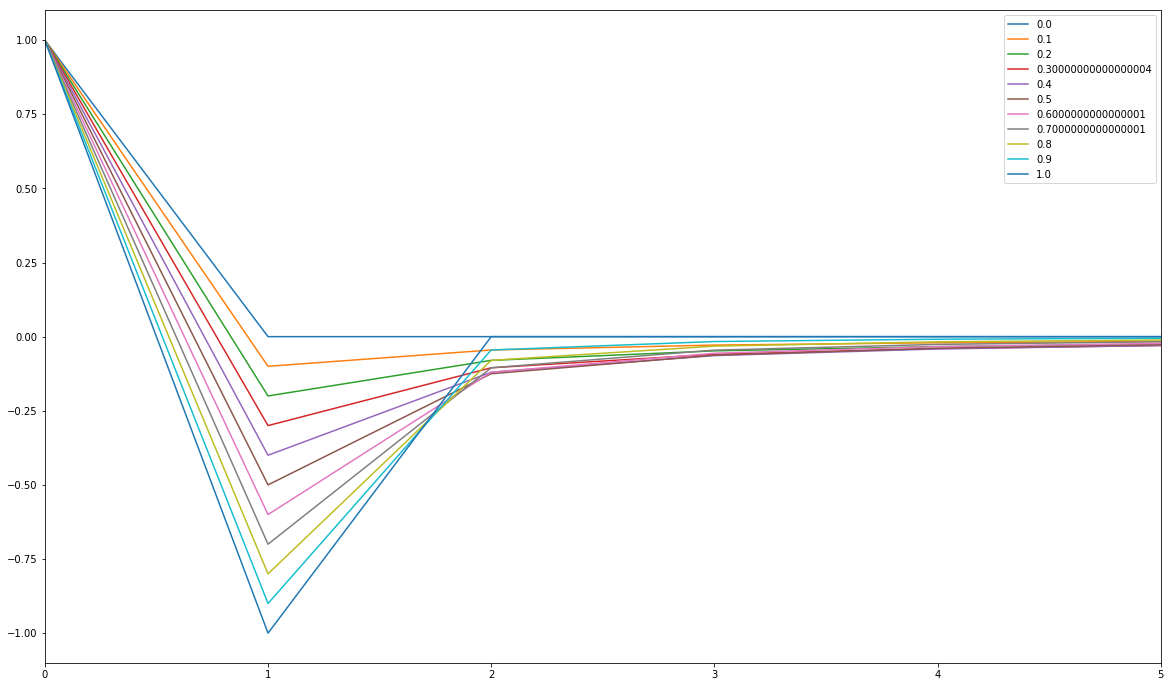

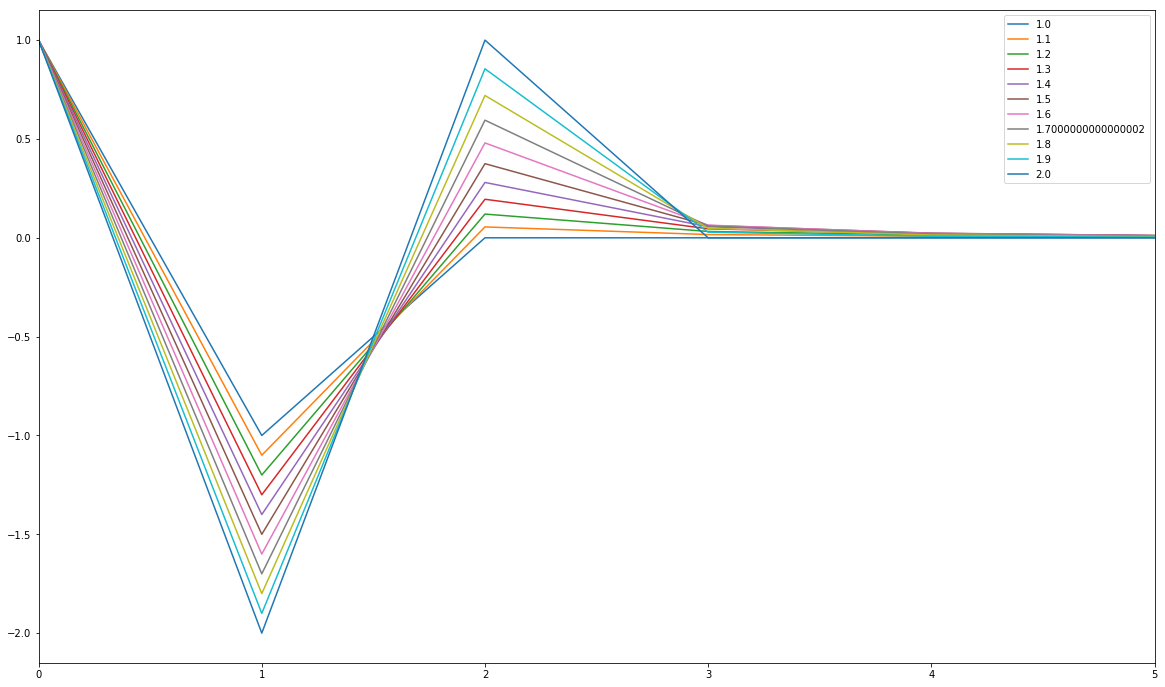

In [302]:
def getWeights(d,size):
    # thres>0 drops insignificant weights
    w=[1.]
    for k in range(1,size):
        w_=-w[-1]/k*(d-k+1)
        w.append(w_)
    w=np.array(w[::-1]).reshape(-1,1)
    return w
#———————————————————————————————————————-
def plotWeights(dRange,nPlots,size):
    w=pd.DataFrame()
    for d in np.linspace(dRange[0],dRange[1],nPlots):
        w_=getWeights(d,size=size)
        w_=pd.DataFrame(w_,index=range(w_.shape[0])[::-1],columns=[d])
        w=w.join(w_,how='outer')
    ax=w.plot(figsize=(20,12))
    ax.legend(loc='upper right')
    return
#———————————————————————————————————————-

plotWeights(dRange=[0,1],nPlots=11,size=6)
plotWeights(dRange=[1,2],nPlots=11,size=6)

In [325]:
frac_df = fracDiff_FFD(df, 1)

In [343]:
# 5.4 cont
# Faced some error w/ actual price data so using sine shift df
d = 1
fracDiff_FFD(fracDiff_FFD(df, d), -d)

,close
9999,8898.458037


In [ ]:
# TODO 5.5 and 5.6, answer 5.4 question